<h1>6. &nbsp;Estudo comparativo - Soluções numéricas e analítica com <i>odeint</i> e <i>solve_ivp</i></h1>

&nbsp; Esta subseção tem como objetivo realizar um estudo similar aos realizados nas seções anteriores, adicionando aproximações geradas através das bibliotecas <i>odeint</i> e <i>solve_ivp</i>

<h2>6.1 &nbsp; O maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Vimos nas seções anteriores o maior passo de derivação para produzir uma aproximação aceitável, com exceção das aproximações geradas através de bibliotecas:

<center><b>Tabela 1 - Passo máximo para obter o erro máximo menor que 0.4 com decréscimo de 0.01</b></center>

| Método | Passo máximo | Erro máximo |
| -- | -- | --  | 
| Euler | 0.35 |  0.3919977 |
| Euler modificado | 2.95 | 0.39933874
| RK4 | 9.86 | 0.39898163 |

<center> Fonte: O autor</center>


&nbsp; Pergunta-se: Qual será o passo máximo, sob as condições dos estudos das seções anteriores, para as aproximações geradas por bibliotecas?&nbsp; Para iniciar este estudo, vamos importar as bibliotecas NumPy, SciPy e Matplotlib:

In [1]:
import numpy as np
import scipy.integrate as sciInt
import matplotlib.pyplot as plt

&nbsp; Carregando o diretório <i><b>python/</b></i> que contém as funções escritas ao longo dos tópicos:

In [2]:
import sys
sys.path.insert(0, '../python')

&nbsp; Importando o <b><i>modelo(&lt;temperatura&gt;,&lt;tempo&gt;)</i></b>:

In [3]:
from modelo import modelo
from f_erro import f_erro

&nbsp; Declarando o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [4]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Uma solução com erro máximo menor que <b>0.4</b> é uma aproximação aceitável para este problema, dada a escala, este valor será o limite superior <i><b>limite_sup</b></i> para o erro máximo. &nbsp; Como é de se esperar, as funções <i>odeint</i> e <i>solve_ivp (RK45)</i> são mais aprimorados que os métodos escritos nas seções anteriores. &nbsp; Então, ao invés de diminuirmos o valore do <i><b>passo</b></i> a fim de encontrar o <i>passo máximo</i>, vamos acrescentar, a fim de verificar se para algum vetor tempo <b><i>vt</i></b>, excederemos o <b><i>limit_sup</i></b>.

In [5]:
limite_sup = 0.4
passo = 0.01
acrescimo = 0.01

<h3>solve_ivp (RK45)</h3>
    
&nbsp; Continuando, escrevemos um <i>loop</i> de forma que o passo de derivação seja reduzido até que o erro máximo entre a solução numérica e analítica seja menor que o limite superior.
<br>
<b>&nbsp; Atenção:</b> Devemos tomar os valores absolutos  dos elementos do vetor erro <b>abs(erro[])</b>:

In [6]:
#variáveis auxiliares
err = np.array([0])
passo_max = np.array([0])
    
while np.amax(err) < limite_sup and passo < 59:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Método de Runge-Kutta 45
    T_rk45 = sciInt.solve_ivp(modelo, t_span=(0,max(vt)), y0=[T0], t_eval=vt)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Chamando a função erro
    err = abs(f_erro(sol_analitica,T_rk45.y[0]))
    
    #Verificando se limite superior é excedido
    if np.amax(err) > 0.4:       
        #Adiciona passo ao vetor passo_max
        passo_max = np.append(passo_max,np.amax(err))
        break

    #Realizando acréscimo do passo de derivação
    passo = passo + acrescimo
    
print('Passo atual: {}'.format(passo))

Passo atual: 59.00999999999683


Passo atual: 59.00999999999683 <br>
Tempo de execução: de 10 à 11 segundos.

&nbsp; Observando o passo atual, podemos concluir que o algoritmo <b>não pôde encontrar </b> um <i>passo</i>, entre 0.01 e 59 com acréscimo de 0.01, que seja maior ou igual a 4. &nbsp; Isto quer dizer:
<center>Tomando o intevalo de tempo de 0 à 60 minutos, para todo <i>passo</i> de tempo entre 0.01 e 59 com acréscimo de 0.01, o erro máximo entre a solução numérica e analítica não excede o valor de 0.4</center> 

<h3>odeint (LSODA)</h3>

&nbsp; Utilizando um algoritmo similar ao escrito em <b>Input [6],</b> vamos verificar se o método <i>LSODA</i> tem o mesmo comportamento que o método Runge-Kutta-Fehlberg.

&nbsp; Declarando variáveis:

In [7]:
limite_sup = 0.4
passo = 0.01
acrescimo = 0.01

&nbsp; Escrevendo algoritmo para obter o passo máximo que gere uma solução aceitável <i><b>passo_max</b></i>:

In [8]:
#variáveis auxiliares
err = np.array([0])
passo_max = np.array([0])
    
while np.amax(err) < limite_sup and passo < 59:
    
    #Criando vetor tempo 
    vt = np.arange(ti,tf,passo)
    
    #Método LSODA
    T_lsoda = sciInt.odeint(modelo, y0=T0, t=vt, tfirst=True)
    
    #Gerando solução analítica
    sol_analitica = 20+60*np.exp(-0.1*vt)
    
    #Algoritmo para a função erro
    err = np.array([80])
    i = 0 
    for elemento in T_lsoda:
        err = np.append(err,abs(sol_analitica[i]-elemento))
        i = i + 1
    err = np.delete(err, [0])
    
    #Verificando se limite superior é excedido
    if np.amax(err) > 0.4:       
        #Adiciona passo ao vetor passo_max
        passo_max = np.append(passo_max,np.amax(err))
        break

    #Realizando acréscimo do passo de derivação
    passo = passo + acrescimo
    
print('Passo atual {}:'.format(passo))

Passo atual 59.00999999999683:


Tempo de execução: de 6 à 7 segundos.

&nbsp; Observando o passo atual, podemos concluir que o algoritmo <b>não pôde encontrar </b> um <i>passo</i>, entre 0.01 e 59 com acréscimo de 0.01, que seja maior ou igual a 4.
<br>
&nbsp; Tanto o método <i>RK45</i> quanto o método <i>LSODA</i>, sob as condições fornecidas, são melhores em termos de convergência quando comparados aos métodos estudados nas seções 3 à 5.

<h2>6.2 &nbsp; Erro cometido entre as soluções numéricas e analítica</h2>

&nbsp; Neste escrever um algoritmo para exibir o gráfico das soluções numéricas e analítica.
<br>
&nbsp; Estamos interessados em comparar com a solução analítica as seguintes aproximações numéricas:
<ol>
    <li>&nbsp;Método de Euler</li>
    <li>&nbsp;Método de Euler modificado</li>
    <li>&nbsp;Método Runge-Kutta de 4ª ordem (RK4)</li>
    <li>&nbsp;Método Runge-Kutta-Fehlberg (RK45)</li>
    <li>&nbsp;LSODA</li>
</ol>


&nbsp; Importando as funções: <b><i>sol_euler</i></b>, <b><i>sol_euler_mod</i></b>, <b><i>sol_rk4</i></b>, <b><i>modelo</i></b> e <b><i>f_erro</i></b>:

In [9]:
from sol_euler import sol_euler
from sol_euler_mod import sol_euler_mod
from sol_rk4 import sol_rk4
from modelo import modelo
from f_erro import f_erro

&nbsp; Declarando o passo de derivação <b><i>h</i></b>, a condição inicial <b><i>T0</i></b>, o tempo inicial <b><i>ti</i></b>, o tempo final <b><i>tf</i></b> e o intervalo de tempo <b><i>vt</i></b>:

In [10]:
#Passo de derivação
h = 0.001

#Condição inicial
T0 = 80

#tempo inicial
ti = 0

#tempo final
tf = 60

#Intervalo de 0 à 60 minutos com passo h
vt = np.arange(ti,tf,h)

&nbsp; Obtendo aproximações pelos métodos numéricos listados:

In [11]:
%%time
#Método de Euler
T_euler = sol_euler(vt,T0)

#Método de Euler modificado
T_euler_mod = sol_euler_mod(vt,T0)

#Método de Runge-Kutta de 4ª ordem
T_rk4 = sol_rk4(vt,T0)

#Método LSODA
T_lsoda = sciInt.odeint(modelo, y0=T0, t=vt, tfirst=True)

#Método de Runge-Kutta 45
T_rk45 = sciInt.solve_ivp(modelo, t_span=(0,max(vt)), y0=[T0], t_eval=vt)

CPU times: total: 5.98 s
Wall time: 5.99 s


Tempo de execução: de 6 à 7 segundos.<br>
&nbsp; Obtendo solução analítica:

In [12]:
sol_analitica = 20+60*np.exp(-0.1*vt)

&nbsp; Exibindo o gráfico contendo o erro entre a solução analítica e as aproximações numéricas.
<center><b>| solução_analítica - aproximação_numérica |</b></center>

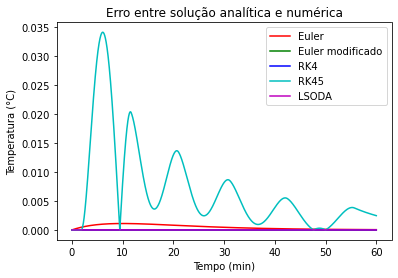

CPU times: total: 2.69 s
Wall time: 2.7 s


In [13]:
%%time

#Método de Euler
plt.plot(vt,abs(f_erro(sol_analitica,T_euler)),'r',label='Euler')

#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Método de Runge-Kutta 45
plt.plot(vt,abs(f_erro(sol_analitica,T_rk45.y[0])),'c',label='RK45')

#Método LSODA
T_lsoda_novo = np.array([80])
i = 0 
for elemento in T_lsoda:
    T_lsoda_novo = np.append(T_lsoda_novo,abs(sol_analitica[i]-elemento))
    i = i + 1
T_lsoda_novo = np.delete(T_lsoda_novo, [0])
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')


#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


&nbsp; Tempo de execução: de 2 à 3 segundos.
<br>
&nbsp; Vamos gerar uma nova figura, removendo a aproximação <b><font color="#00bfbf">RK45</font></b>, a fim de ampliarmos o gráfico e visualizarmos novas curvas.

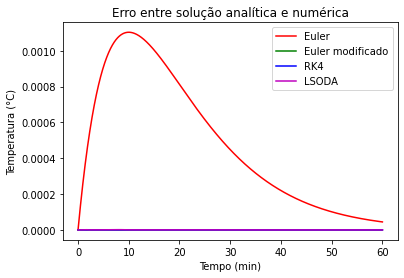

CPU times: total: 406 ms
Wall time: 410 ms


In [14]:
%%time
#Método de Euler
plt.plot(vt,abs(f_erro(sol_analitica,T_euler)),'r',label='Euler')

#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Método LSODA
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Tempo de execução: de 400 à 500 milisegundos

Removendo a aproximação de <b><font color="#ff1a1a">Euler</font></b>:

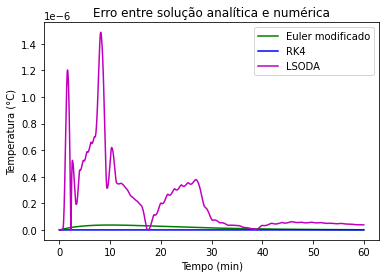

CPU times: total: 328 ms
Wall time: 326 ms


In [15]:
%%time
#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)),'b',label='RK4')

#Método LSODA
plt.plot(vt,T_lsoda_novo ,'m',label='LSODA')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Tempo de execução: de 300 à 400 milisegundos.
<br>
Removendo a curva <b><font color="#bf00bf">LSODA</font></b>:

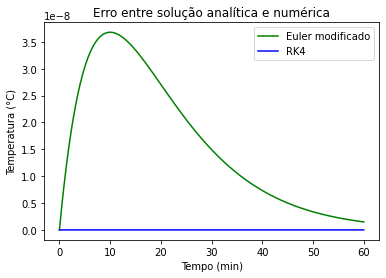

CPU times: total: 297 ms
Wall time: 293 ms


In [16]:
%%time
#Método de Euler modificado
plt.plot(vt,abs(f_erro(sol_analitica,T_euler_mod)),'g',label='Euler modificado')

#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Tempo de execução: de 300 à 400 milisegundos
<br>
Finalmente, <i>plotando</i> somente a curva RK4, deixando de lado <b><font color="#198c19">Euler modificado</font></b>:

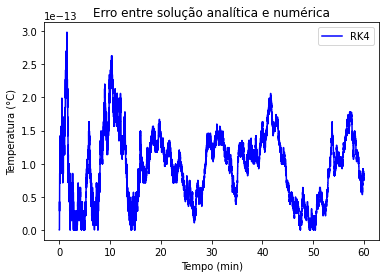

CPU times: total: 234 ms
Wall time: 226 ms


In [17]:
%%time
#Método de Runge-Kutta de 4ª ordem
plt.plot(vt,abs(f_erro(sol_analitica,T_rk4)) ,'b',label='RK4')

#Exibindo figura
plt.title('Erro entre solução analítica e numérica')
plt.xlabel('Tempo (min)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Tempo de execução: de 200 à 300 milisegundos